# Time Series

## Box - Jenkins Method

### Load Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")

data = pd.read_csv('kingage_with_date.csv', index_col = 0)
data.head()

,age
date,
1981-01-01,60
1982-01-01,43
1983-01-01,67
1984-01-01,50
1985-01-01,56


In [2]:
data

,age
date,
1981-01-01,60
1982-01-01,43
1983-01-01,67
1984-01-01,50
1985-01-01,56
1986-01-01,42
1987-01-01,50
1988-01-01,65
1989-01-01,68


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1981-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     42 non-null     int64
dtypes: int64(1)
memory usage: 672.0+ bytes


- 결측치는 없음.

## 1. Indentification of Models

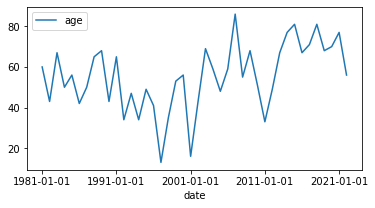

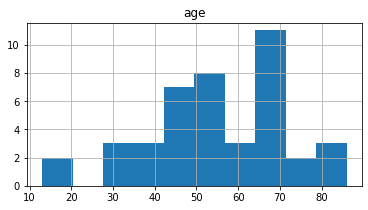

In [4]:
fig, ax = plt.subplots(figsize = (6,3))
data.plot(ax = ax)
plt.show()

fig, ax = plt.subplots(figsize = (6,3))
data.hist(ax = ax)
plt.show()

- 추세 및 계절성이 보임

#### Seasonal Decomposition for seasonal Time Series

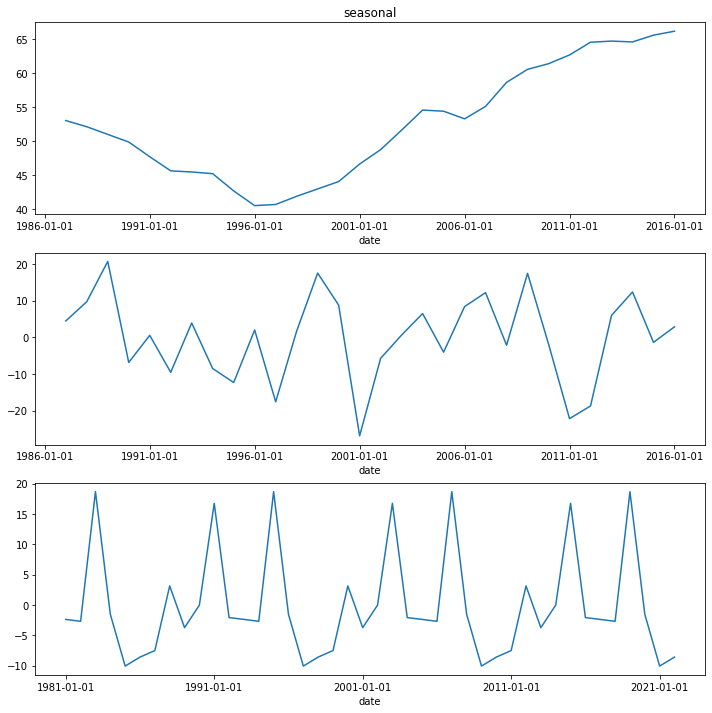

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data, period = 12)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (12,12))
decomp.trend.plot(ax=ax1)
ax1.set_title('trend')
decomp.resid.plot(ax=ax2)
ax1.set_title('resid')
decomp.seasonal.plot(ax=ax3)
ax1.set_title('seasonal')
plt.show()

- 계절성을 보이는것을 확인할 수 있음.

In [6]:
data_df = data.diff(12)
data_df = data_df.dropna()

#### Auto Correlation

##### ACF
- 자기상관함수
- 시차 k에 대하여 관측치 간 상관계수 함수


##### PCAF
- 편 자기상관함수
- 시차 k에 대해서 $Z_t$와 $Z_t+k$ 사이에 있는 관측치와의 상호 의존성을 제거한 함수
- 순수한 상관관계 파악 가능

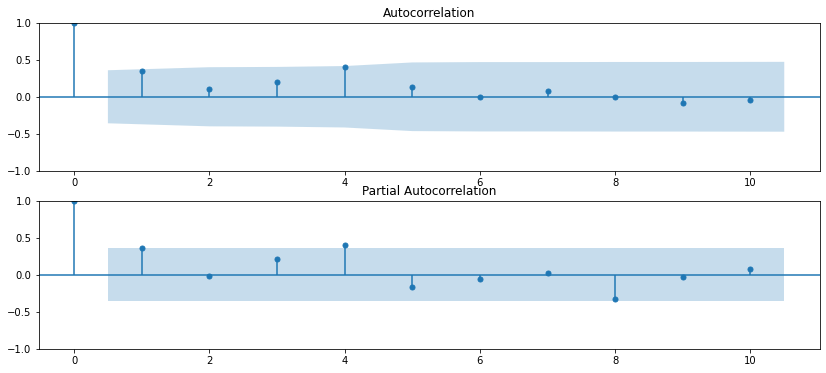

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14,6), sharex = False, sharey = False)
ax1 = plot_acf(data_df, lags = 10, ax = ax1)
ax2 = plot_pacf(data_df, lags = 10, ax = ax2)
plt.show()

- ACF와 PACF 그래프를 확인해본 결과 이 data는 stationary 하지 않음.
- Dickey-Fuller test를 통해 확인.

#### Dickey - Fuller

- Dickey - Fuller 검정은 ARIMA 모형의 적분 차수를 판단하기 위한 검정 방법
- 만약 p-value 값이 임계치보다 낮으면 가설을 기각하고 data가 stationary
- 만약 p-value 값이 임계치보다 높으면 가설을 채택하고 data가 non-stationary

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['age'])
print('ADF Statistic : %f'%result[0])
print('p-value : %f'%result[1])
print('Critical Test Statistics Values : ')
for key, value in result[4].items():
     print('\t%s: %.3f'%(key, value))

ADF Statistic : -4.090230
p-value : 0.001005
Critical Test Statistics Values : 
	1%: -3.601
	5%: -2.935
	10%: -2.606


- p-value가 0.05보다 낮으므로 stationary한 data, 가설 기각.

## 2. Estimate Parameter 

In [10]:
from pmdarima.arima import auto_arima

model = auto_arima(data['age'], d=1, D=1,seasonal=True, m=12, trend='c',start_p=0, start_q=0, max_order=6,max_p = 2, max_q = 2, test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=271.273, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=277.925, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=268.030, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=276.943, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=269.727, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=269.726, Time=0.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=271.726, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=269.364, Time=0.07 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=265.703, Time=0.13 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=274.037, Time=0.06 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=267.508, Time=0.37 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=267.528, Time=0.36 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AI

- AIC score는 ARIMA(2,1,0)(1,1,0)[12]에서 가장 작게 나옴

## 3. Modeling

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data ,order = (2,1,0), seasonal_order=(1,1,0,12), enforce_invertibility= False, enforce_stationarity = False)
result = model.fit()
print(result.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55916D+00    |proj g|=  2.47268D-02

At iterate    5    f=  1.55250D+00    |proj g|=  2.45275D-02

At iterate   10    f=  1.51885D+00    |proj g|=  2.26803D-02

At iterate   15    f=  1.51795D+00    |proj g|=  2.59452D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   2.595D-06   1.518D+00
  F =   1.5179529245719874     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

/Users/jody/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/jody/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


- p-value가 0.05보다 작아서 유의미.

### 4. Forecast & Metrics

#### Forecast

In [68]:
forecast_value = result.get_forecast(steps = 17)
forecast_ci = forecast_value.conf_int()
forecast_value.summary_frame()

age,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-01,58.629330,16.967996,25.372669,91.885991
2024-01-01,81.595719,20.357180,41.696379,121.495059
2025-01-01,60.765982,20.768128,20.061199,101.470766
2026-01-01,74.530465,22.868351,29.709320,119.351609
2027-01-01,96.085466,25.616969,45.877130,146.293802
2028-01-01,86.250980,26.825640,33.673692,138.828269
2029-01-01,78.348042,28.026620,23.416877,133.279208
2030-01-01,89.002685,29.749888,30.693976,147.311395
2031-01-01,101.212934,31.160024,40.140409,162.285459
2032-01-01,83.164902,32.301892,19.854358,146.475446


<AxesSubplot:xlabel='date'>

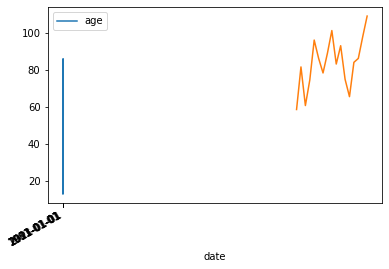

In [72]:
data.plot()
forecast_value.predicted_mean.plot()